In [112]:
import numpy as np 
import os
import matplotlib.pyplot as plt 
import cv2
import pandas as pd
import glob

In [78]:
image=cv2.imread('deadPoetsSociety.jpg')

In [58]:
cv2.imshow('displayed image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(<Axes: >, <matplotlib.image.AxesImage at 0x26941d6e750>)

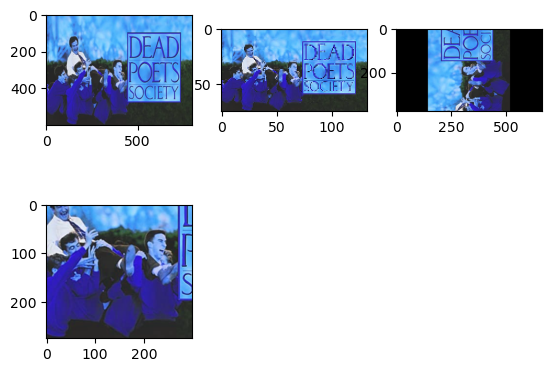

In [44]:
#resizing the image in dimensions 
new_width, new_height= 800,600
resized_image=cv2.resize(image,(new_width,new_height))
#cv2.imshow('resized image', resized_image)
plt.subplot(231), plt.imshow(resized_image,cmap='viridis')

#resizing by specifying a scaling factor
scale_percent=20
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resizedImage=cv2.resize(image,(width,height))
plt.subplot(232), plt.imshow(resizedImage,cmap='viridis')

# Rotate the image by 90 degrees clockwise
center = (image.shape[1]//2, image.shape[0]//2)
angle=90
scale=1.0
rotation_matrix=cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
plt.subplot(233), plt.imshow(rotated_image, cmap='viridis')

#cropping an image
start_row, start_col = 100, 100
end_row, end_col = 400, 400 
cropped_image = image[start_row:end_row , start_col:end_col]
plt.subplot(234), plt.imshow(cropped_image, cmap='viridis')

(<Axes: >, <matplotlib.image.AxesImage at 0x26942923e00>)

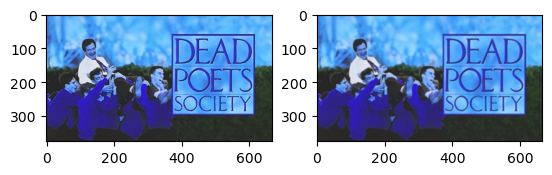

In [56]:
#guassian blur: reduces image noise and details 
blur_size=(5,5)
sigma=0
blurred_image=cv2.GaussianBlur(image, blur_size, sigma)
plt.subplot(122), plt.imshow(blurred_image, cmap='viridis')
plt.subplot(121), plt.imshow(image, cmap='viridis')

(<Axes: >, <matplotlib.image.AxesImage at 0x269409fa150>)

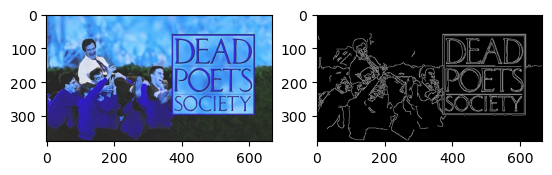

In [62]:
#edge detection: CANNY algorithm
upper_threshold=200
lower_threshold=100
edges=cv2.Canny(image,lower_threshold, upper_threshold)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.imshow(edges, cmap='gray')

In [121]:
#harris corner detection: detects the corners in an image
#corners can be interpreted as a junction of two edges 
image1=cv2.imread('image1.jpeg')

def GetSobel(image, Sobel, width, height):
    #here we are creating a zero array called zeke of the order width*height
    zeke=np.zeros((width, height), np.float32)
    for rows in range(width):
        for cols in range(height):
             if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                  for ind in range(3):
                        for ite in range(3):
                            zeke[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
             else:
                 zeke[rows][cols] = image[rows][cols]
    return zeke

def HarrisCornerDetection(image):
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #horizontal array
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) #vertical array 
    w, h= image.shape
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)
    #eliminating the negative values here we are multiplying by -1 
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
    #square of the matrix
    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)
    
    #multiplying the matrices 
    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)
    
    #using gaussian blur 
    sigma=1.4
    kernelsize=(3,3)
    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, sigma)
    
    #finding corner strength of each pixel 
    alpha = 0.06
    R = np.zeros((w, h), np.float32) #we are creating a zero array called R of the order w*h
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R
#we have appended our requirements in R 

image1 = cv2.imread('image1.jpeg', cv2.IMREAD_GRAYSCALE)
w, h = image1.shape
bgr = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)
R = HarrisCornerDetection(image1)
#we have finished the corner detection 
#now we plot and mark the corners
CornerStrengthThreshold = 600000
radius = 1
color = (0, 255, 0)  # Green
thickness = 1
# we have given a threshold of 60k but there might be corner strenghts above the threshold so we create pointlist to check it
PointList = []
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max = R[row][col]

            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break
            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))
cv2.imshow("Corners", bgr)
outname = "Output_" + str(CornerStrengthThreshold) + ".png"
cv2.imwrite(outname, bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()               
#plt.subplot(121), plt.imshow(R)
#plt.subplot(122), plt.imshow(image1)